IMPORTING THE LIBRARIES

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import scipy.stats as scp;
from sklearn.feature_selection import RFE;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.preprocessing import LabelEncoder;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import ExtraTreesRegressor;
from sklearn.metrics import r2_score,accuracy_score;
import statsmodels.api as apl;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import cross_val_score,KFold;
from sklearn.model_selection import StratifiedKFold;
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score;
from imblearn.over_sampling import SMOTE ;
import collections;
from sklearn.linear_model import Ridge;
from numpy import absolute;
from sklearn.model_selection import GridSearchCV;
from numpy import arange;
from sklearn.linear_model import Lasso;
from sklearn.linear_model import ElasticNet;
from imblearn.under_sampling import NearMiss;

IMPORTING THE DATASET


In [3]:
df = pd.read_csv("heart_disease.csv");
print(df.info())
print(df.shape)
df=df.drop(["heart_diagnosis"],axis=1);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   gender           303 non-null    int64  
 2   cp               303 non-null    int64  
 3   trestbps         303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fbs              303 non-null    int64  
 6   restecg          303 non-null    int64  
 7   thalach          303 non-null    int64  
 8   exang            303 non-null    int64  
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    int64  
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
 14  heart_disease    303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB
None
(303, 15)


In [4]:
feature_having_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print('feature having na:- ', feature_having_na);
numerical_feature = [feature for feature in df.columns if df[feature].dtypes !='O' ]
print('numerical features are ', numerical_feature, 'count of numerical featuers are ', len(numerical_feature))
categorical_feature = list(set(df.columns)-set(numerical_feature))
print('categorical_feature are ', categorical_feature, 'count of categorical_feature are ', len(categorical_feature))

descrete_features = [feature for feature in numerical_feature if len(df[feature].unique())<25]
print('descrete features are ', descrete_features, 'count of descrete_features are ', len(descrete_features))


feature having na:-  ['ca', 'thal']
numerical features are  ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_disease'] count of numerical featuers are  14
categorical_feature are  [] count of categorical_feature are  0
descrete features are  ['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heart_disease'] count of descrete_features are  9


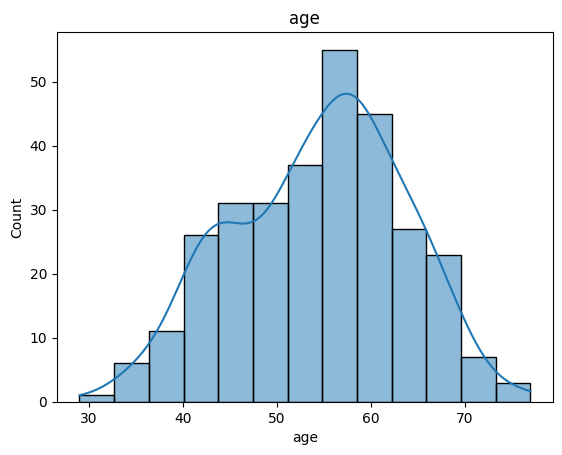

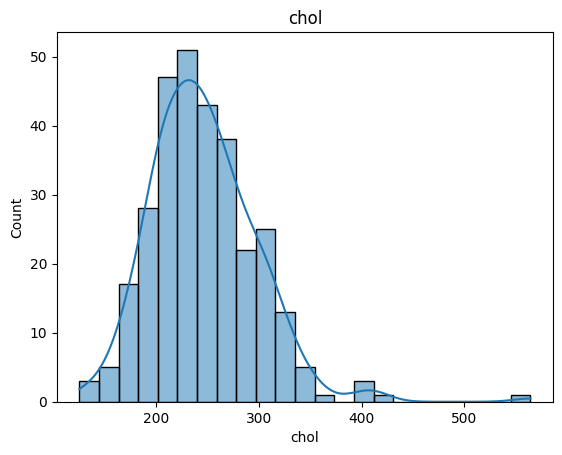

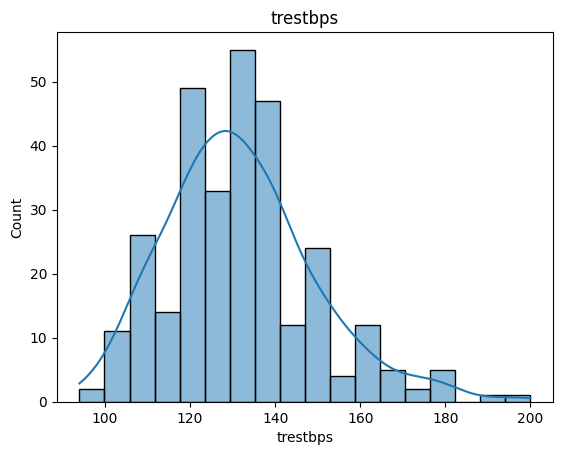

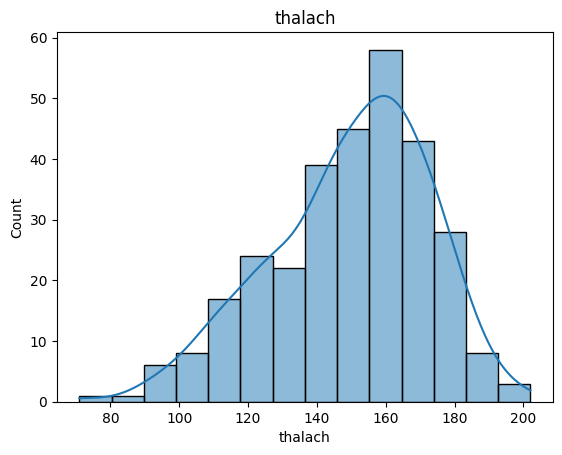

In [5]:
sns.histplot(df["age"],kde=True)
plt.title("age")
plt.show()

sns.histplot(df["chol"],kde=True)
plt.title("chol")
plt.show()

sns.histplot(df["trestbps"],kde=True)
plt.title("trestbps")
plt.show()


sns.histplot(df["thalach"],kde=True)
plt.title("thalach")
plt.show()

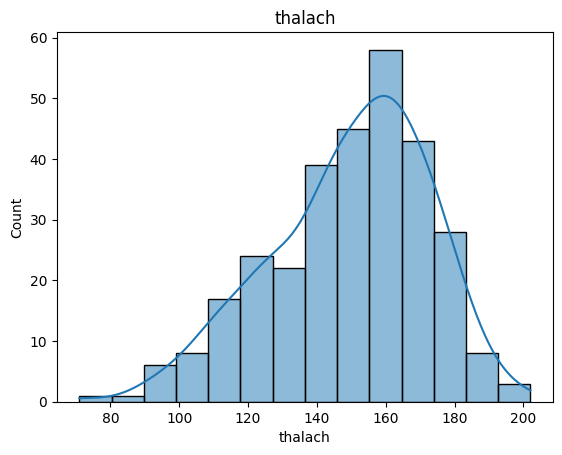

the skewness in the data  age             -0.209060
gender          -0.774935
cp              -0.841754
trestbps         0.706035
chol             1.135503
fbs              1.986652
restecg          0.019900
thalach         -0.537449
exang            0.742532
oldpeak          1.269720
slope            0.508316
ca               1.189352
thal             0.244447
heart_disease    0.166406
dtype: float64
the skewness  -0.00029333593526698325


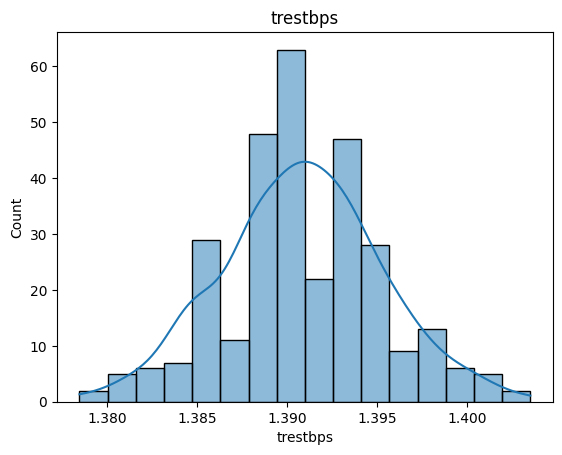

the skewness  -0.005490869741412223


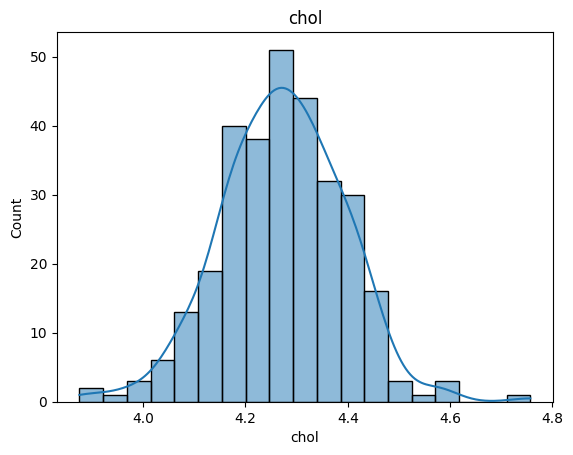

the skewness  -0.07401263728050311


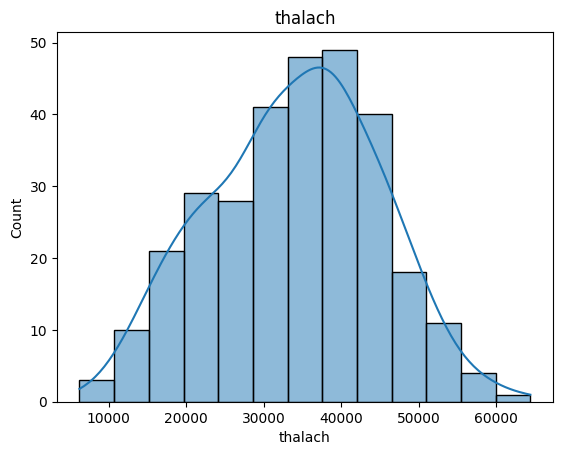

In [6]:
sns.histplot(df["thalach"],kde=True)
plt.title("thalach")
plt.show()
print("the skewness in the data ",df.skew())
df["trestbps"],lam =scp.boxcox(df["trestbps"])
print("the skewness " ,df["trestbps"].skew())
sns.histplot(df["trestbps"],kde=True)
plt.title("trestbps")
plt.show()
df["chol"],lam =scp.boxcox(df["chol"])
print("the skewness " ,df["chol"].skew())
sns.histplot(df["chol"],kde=True)
plt.title("chol")
plt.show()
df["thalach"],lam =scp.boxcox(df["thalach"])
print("the skewness " ,df["thalach"].skew())
sns.histplot(df["thalach"],kde=True)
plt.title("thalach")
plt.show()



In [7]:
print(" Duplicates in the data ",df[df.duplicated()])
df = df.drop_duplicates();
print(df)
print(" NULL values in the data \n",(df.isnull().sum()))


 Duplicates in the data  Empty DataFrame
Columns: [age, gender, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, heart_disease]
Index: []
     age  gender  cp  trestbps      chol  fbs  restecg       thalach  exang  \
0     63       1   1  1.394424  4.252245    1        2  33091.847813      0   
1     67       1   4  1.397425  4.373018    0        2  15865.769764      1   
2     67       1   4  1.388045  4.241932    0        2  23612.550295      1   
3     37       1   3  1.390846  4.294009    0        0  54198.612744      0   
4     41       0   2  1.390846  4.172650    0        2  44949.807870      0   
..   ...     ...  ..       ...       ...  ...      ...           ...    ...   
298   45       1   1  1.384818  4.326131    0        0  24859.102742      0   
299   68       1   4  1.394205  4.139159    1        0  28812.910766      0   
300   57       1   4  1.390846  3.900026    0        0  18259.765695      1   
301   57       0   2  1.390846  4.259853    0

In [8]:
print(" unigue values in the data ", df.nunique());
df['ca'] = df['ca'].fillna(df['ca'].mode().iloc[0]);
df['thal'] = df['thal'].fillna(df['thal'].mode().iloc[0]);
print( " null values in ca ", df.isna().sum());

 unigue values in the data  age               41
gender             2
cp                 4
trestbps          50
chol             152
fbs                2
restecg            3
thalach           91
exang              2
oldpeak           40
slope              3
ca                 4
thal               3
heart_disease      2
dtype: int64
 null values in ca  age              0
gender           0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64


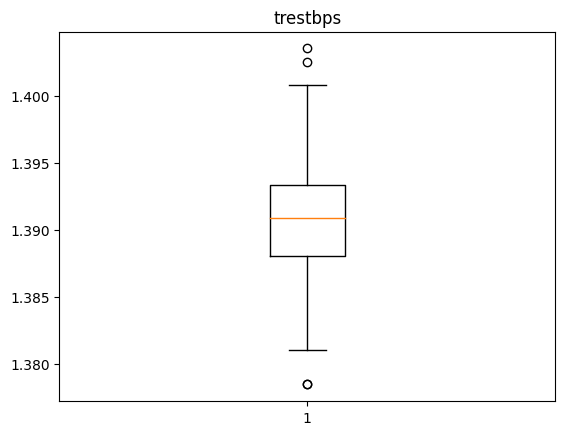

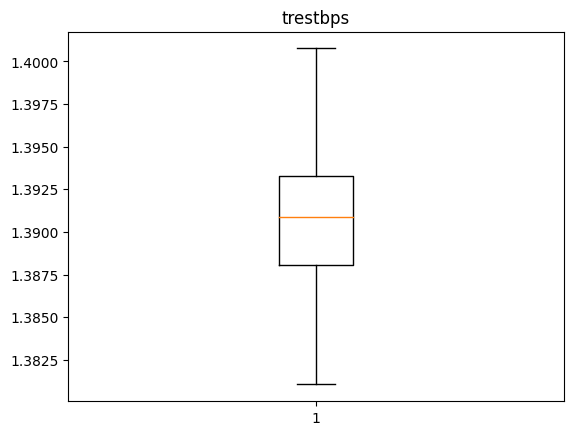

In [9]:
plt.boxplot(df["trestbps"])
plt.title("trestbps")
plt.show()

Q1= np.percentile(df["trestbps"],25)
Q3= np.percentile(df["trestbps"],75)
IQR = Q3-Q1
lwr_bound=Q1-(1.5*IQR)
upr_bound=Q3+(1.5*IQR)
df.drop(df[df["trestbps"]>=upr_bound].index,inplace=True)
df.drop(df[df["trestbps"]<=lwr_bound].index,inplace=True)
plt.boxplot(df["trestbps"])
plt.title("trestbps")
plt.show()


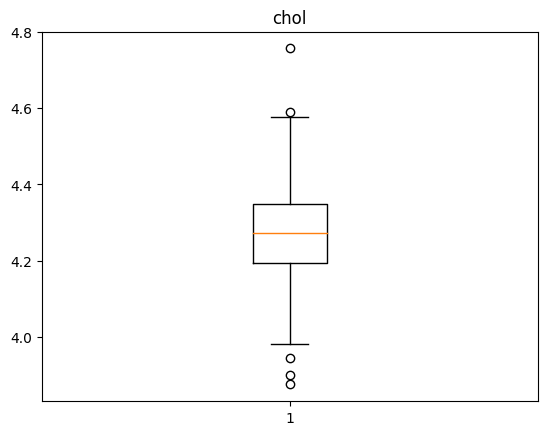

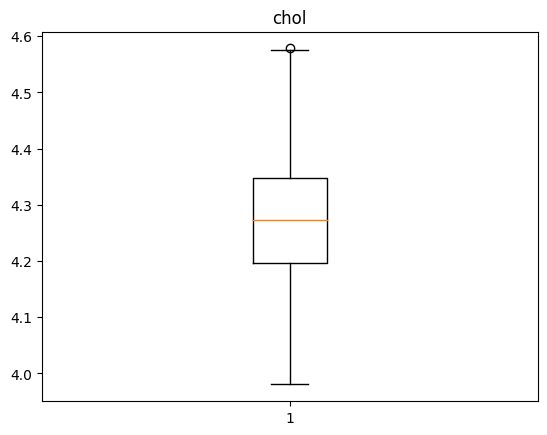

In [10]:
plt.boxplot(df["chol"])
plt.title("chol")
plt.show()

Q11= np.percentile(df["chol"],25)
Q13= np.percentile(df["chol"],75)
IQR3 = Q13-Q11
lwr_bound3=Q11-(1.5*IQR3)
upr_bound3=Q13+(1.5*IQR3)
df.drop(df[df["chol"]>=upr_bound3].index,inplace=True)
df.drop(df[df["chol"]<=lwr_bound3].index,inplace=True)

plt.boxplot(df["chol"])
plt.title("chol")
plt.show()

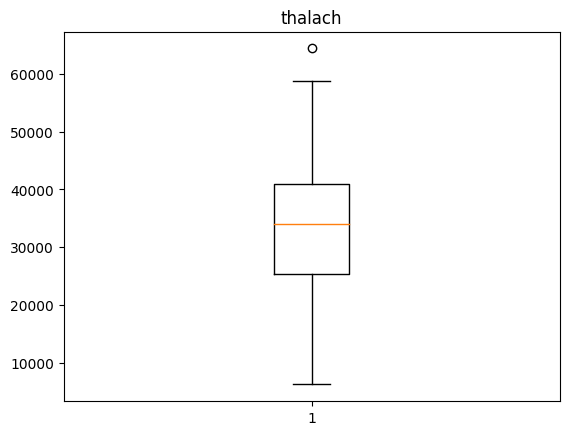

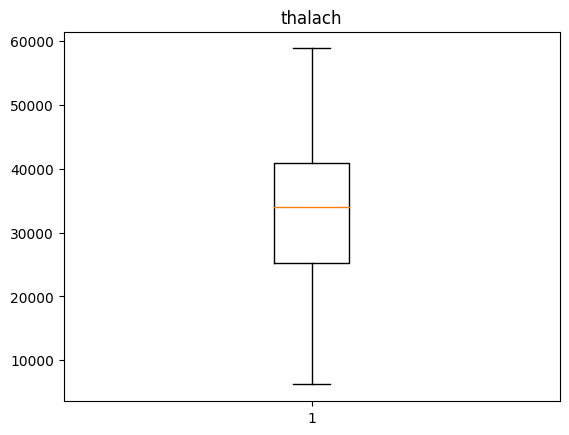

In [11]:
plt.boxplot(df["thalach"])
plt.title("thalach")
plt.show()

Q21= np.percentile(df["thalach"],25)
Q23= np.percentile(df["thalach"],75)
IQR1 = Q23-Q21
lwr_bound1=Q21-(1.5*IQR1)
upr_bound1=Q23+(1.5*IQR1)
df.drop(df[df["thalach"]>upr_bound1].index,inplace=True)
df.drop(df[df["thalach"]<lwr_bound1].index,inplace=True)
plt.boxplot(df["thalach"])
plt.title("thalach")
plt.show()

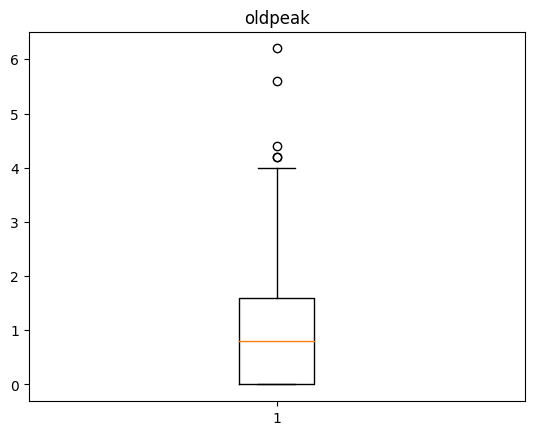

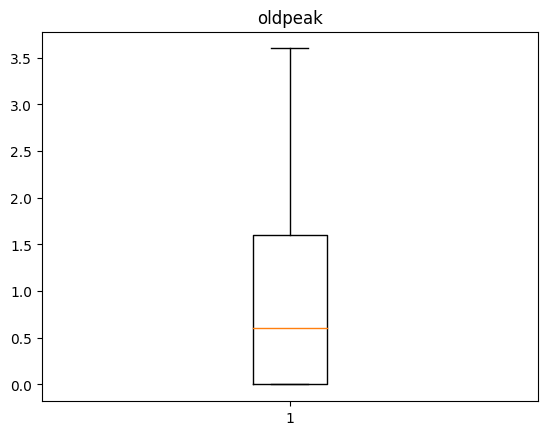

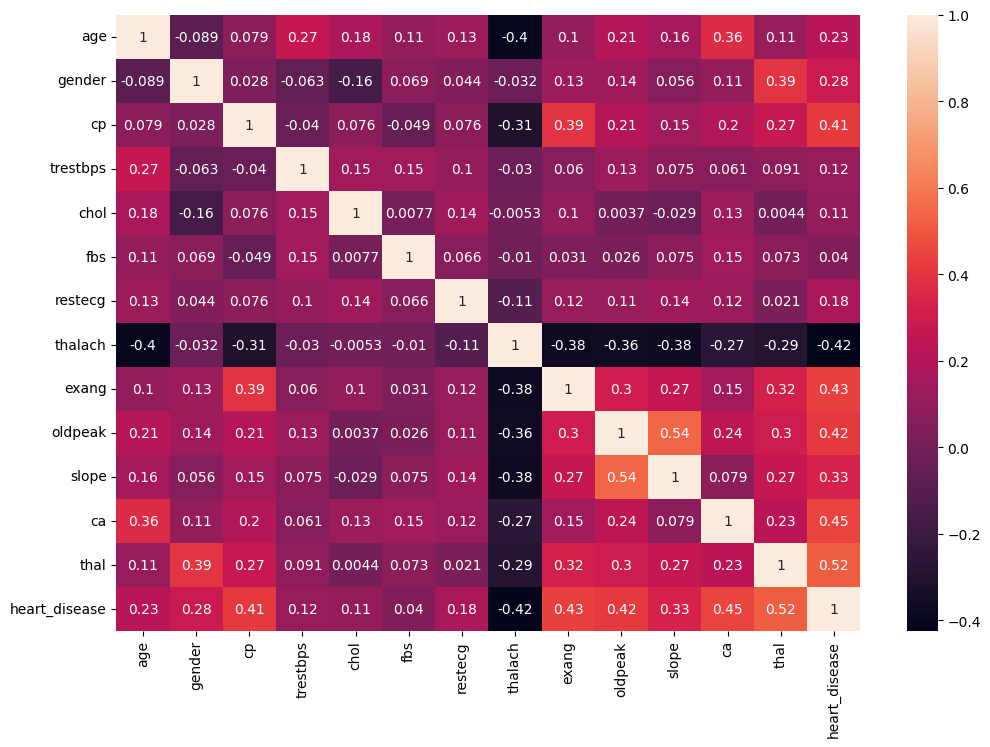

In [12]:
plt.boxplot(df["oldpeak"])
plt.title("oldpeak")
plt.show()

Q5= np.percentile(df["oldpeak"],25)
Q7= np.percentile(df["oldpeak"],75)
IQR2 = Q7-Q5
lwr_bound2=Q5-(1.5*IQR2)
upr_bound2=Q3+(1.5*IQR2)
df.drop(df[df["oldpeak"]>upr_bound2].index,inplace=True)
df.drop(df[df["oldpeak"]<lwr_bound2].index,inplace=True)
plt.boxplot(df["oldpeak"])
plt.title("oldpeak")
plt.show()
plt.figure(figsize=(12,8))
cor=df.corr();
sns.heatmap(cor,annot=True);
plt.show();


In [13]:
x=df.drop(["heart_disease"],axis=1)
y=df["heart_disease"]

print(x)
print(y)

     age  gender  cp  trestbps      chol  fbs  restecg       thalach  exang  \
0     63       1   1  1.394424  4.252245    1        2  33091.847813      0   
1     67       1   4  1.397425  4.373018    0        2  15865.769764      1   
2     67       1   4  1.388045  4.241932    0        2  23612.550295      1   
3     37       1   3  1.390846  4.294009    0        0  54198.612744      0   
4     41       0   2  1.390846  4.172650    0        2  44949.807870      0   
..   ...     ...  ..       ...       ...  ...      ...           ...    ...   
297   57       0   4  1.393303  4.272300    0        0  21225.362319      1   
298   45       1   1  1.384818  4.326131    0        0  24859.102742      0   
299   68       1   4  1.394205  4.139159    1        0  28812.910766      0   
301   57       0   2  1.390846  4.259853    0        2  46127.851143      0   
302   38       1   3  1.392836  4.079570    0        0  45536.722405      0   

     oldpeak  slope   ca  thal  
0        2.3      

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train)
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)

     age  gender  cp  trestbps      chol  fbs  restecg       thalach  exang  \
274   59       1   1  1.391866  4.172650    0        0  39311.153765      0   
87    53       0   3  1.390315  4.207001    0        2  18259.765695      0   
270   61       1   4  1.393303  4.181442    0        2  27459.094038      1   
160   46       1   2  1.381458  4.151574    1        0  36127.489397      0   
31    60       1   4  1.387126  4.244529    1        0  38233.402176      1   
..   ...     ...  ..       ...       ...  ...      ...           ...    ...   
205   45       1   4  1.393760  4.417988    0        2  31629.107788      1   
13    44       1   2  1.388045  4.323899    0        0  45536.722405      0   
234   54       0   3  1.397425  4.163716    0        0  39856.249848      0   
203   64       0   3  1.393303  4.425434    0        0  25282.514145      0   
15    57       1   3  1.395481  4.054559    0        0  46127.851143      0   

     oldpeak  slope   ca  thal  
274      0.8      

In [15]:
log = LogisticRegression()
rfe=RFE(log)
l=rfe.fit(x,y)

print("Num Features: %d" % l.n_features_)
print("Selected Features",x.columns[l.support_])
print("Feature Ranking: %s" % l.ranking_)

Num Features: 6
Selected Features Index(['gender', 'cp', 'chol', 'exang', 'slope', 'ca'], dtype='object')
Feature Ranking: [7 1 1 6 1 3 5 8 1 2 1 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
c= ExtraTreesRegressor()
lc=c.fit(x,y)
print(x.columns)
print(lc.feature_importances_)

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[0.07588618 0.03641076 0.12868197 0.05345369 0.05637034 0.016686
 0.03246312 0.06026817 0.04298191 0.06210729 0.04681895 0.13462
 0.25325164]


In [17]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
counter = collections.Counter(y_train_res)
print(" value counts",counter)

After OverSampling, the shape of train_X: (242, 13)
After OverSampling, the shape of train_y: (242,) 

 value counts Counter({1: 121, 0: 121})


In [18]:
under_sample = NearMiss(version=1,n_neighbors=3)
x_re , y_re = under_sample.fit_resample(x,y)
counter = collections.Counter(y_re)
print(counter)

Counter({0: 129, 1: 129})


In [19]:
log_reg = LogisticRegression(penalty='l2')
log_reg.fit(X_train_res,y_train_res)

log_pre= log_reg.predict(x_test)
print("accuracy is ", accuracy_score(y_test,log_pre))
print("accuracy is ", accuracy_score(y_train,log_reg.predict(x_train)))
print(confusion_matrix(y_test,log_pre))

accuracy is  0.7719298245614035
accuracy is  0.868421052631579
[[30  5]
 [ 8 14]]


In [20]:
log_res = LogisticRegression(penalty='l2')
log_res.fit(x_re,y_re)
log_l = log_res.predict(x_test)
print(" Undersampling accuracy is ", accuracy_score(y_test,log_l))

 Undersampling accuracy is  0.8245614035087719


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
k_fold= 10


kf = KFold(n_splits= k_fold, shuffle = True, random_state= 42 )

cross_val_res = cross_val_score(log_reg, x, y , cv= kf)



print("cross validation results " ,cross_val_res)
print("mean accuracy ",cross_val_res.mean() )
print(" value counts", df.heart_disease.value_counts())
print("f1 score",f1_score(y_test, log_pre,average='macro'))


cross validation results  [0.82758621 0.75862069 0.65517241 0.86206897 0.89655172 0.78571429
 0.85714286 0.92857143 0.92857143 0.82142857]
mean accuracy  0.8321428571428571
 value counts 0    156
1    129
Name: heart_disease, dtype: int64
f1 score 0.7524223187437353


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c